# 판다스(Pandas) 심화

## 데이터프레임 정렬 

In [1]:
import numpy as np
import pandas as pd
print('DataFrame: ')

data = {'col1':[2,1,9,8,7,4],
        'col2':['A','A','B',np.nan,'D','C'],
       'col3':[0,1,9,4,2,3]}


index = [1,3,2,5,0,4]

df = pd.DataFrame(data, index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [2]:
df = df.sort_index(axis=0) 
#df = 이렇게 같은 것을 넣으면 업데이트라는 의미 
# axis=0은 행(인덱스)을 기준으로 정렬
df

,col1,col2,col3
0,7,D,2
1,2,A,0
2,9,B,9
3,1,A,1
4,4,C,3
5,8,NaN,4


In [3]:
df = df.sort_index(axis=1, ascending=False)
# axis=1은 열(컬럼명) 기준 정렬을 의미함.
df

,col3,col2,col1
0,2,D,7
1,0,A,2
2,9,B,9
3,1,A,1
4,3,C,4
5,4,NaN,8


In [4]:
# sort_value 1
# sort_values()는 기준 컬럼과 정렬 방법을 인수로 주면 해당 컬럼을 기준으로 정렬
# 아래 코드는 col1을 기준으로 오름차순 정렬
sorted_df1 = df.sort_values('col1',ascending=True)
sorted_df1

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [5]:
# sort_value 2
# 정렬 기준을 2개 줄 수 있음 이때는 리스트를 사용하기
# col2를 기준으로 오름차순 한 후 col2의 값이 같은 경우, col1을 기준으로 내림차준 정렬한 결과를 출력
# 아래 코드에서 본다면 col2에서 A가 같기 때문에 A값을 가진 col1의 셀을 기준으로 내림차순한다
sorted_df2 = df.sort_values(['col1','col2'],ascending=[True,False])
sorted_df2

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [6]:
x = np.random.randint(1,5,size=(10,5))
x

array([[2, 1, 4, 1, 3],
       [1, 2, 3, 3, 3],
       [4, 1, 1, 3, 2],
       [3, 1, 2, 2, 1],
       [3, 4, 2, 3, 4],
       [3, 2, 4, 1, 4],
       [4, 1, 2, 3, 2],
       [3, 2, 2, 3, 1],
       [2, 2, 1, 3, 4],
       [2, 3, 2, 1, 4]], dtype=int32)

In [7]:
x = np.random.rand(10,5)
x

array([[0.30025083, 0.15119365, 0.94426374, 0.97644445, 0.98409333],
       [0.12246263, 0.87014053, 0.11489504, 0.31807338, 0.55814374],
       [0.64030187, 0.10629007, 0.96557199, 0.53124054, 0.35027715],
       [0.29698475, 0.80678728, 0.14662475, 0.78260858, 0.99289477],
       [0.72702907, 0.78017949, 0.04504961, 0.10671427, 0.9625044 ],
       [0.34437844, 0.90886477, 0.10506415, 0.18560871, 0.39304089],
       [0.9277898 , 0.29753592, 0.88404628, 0.99869663, 0.49511386],
       [0.36915964, 0.68690537, 0.7611002 , 0.46464742, 0.26261641],
       [0.68816485, 0.57835347, 0.69879695, 0.8617777 , 0.87526686],
       [0.42233901, 0.41906481, 0.07568644, 0.83193303, 0.51904261]])

In [8]:
x = np.random.normal(5,3,(10,5)) # 평균5, 표준편차 3
print(x)
print(np.mean(x),np.std(x),x.min(),x.max())

[[-0.88430846  3.1230214  10.27464053  4.33066812  4.07421591]
 [ 5.55721845  0.91897054  3.61075921  5.53035798 -0.02461095]
 [-0.53189129  2.7579245   9.42497928 10.2903015   4.67394383]
 [ 6.66466412  7.51866958 -0.04377297  4.6470764   2.52629528]
 [ 7.47872879  9.46569964  6.54750925  0.07339493  8.54039309]
 [ 9.06430777  5.55140173  6.57586191  4.87236034  6.39292873]
 [ 6.61163409  6.61107586  7.2397233   6.09316029  5.93005835]
 [ 4.60923822  6.5570275   0.60858569  1.34917499  2.42394547]
 [ 3.3460677  10.5219874   8.60355665  6.26038769  2.49930048]
 [ 8.95822302  4.97976876  0.76951089  2.96888555  5.6736406 ]]
5.032333232994225 3.061345772723663 -0.8843084563979096 10.521987398401691


In [9]:
x = np.random.randn(10,5)
print(x)
print(np.mean(x),np.std(x),x.min(),x.max())

[[ 0.38411812  0.68394633  0.33681223  0.01976808 -0.8814523 ]
 [ 1.72314182  0.20641723 -0.55012283  0.224856    0.64849753]
 [ 0.61755095  0.64837471  1.98866584  0.37394052 -0.13401184]
 [ 0.02605308  0.70572076 -0.56863748 -0.61930661 -0.78272569]
 [-0.35763156  0.51338369 -1.29603106 -0.64353885 -0.95142267]
 [ 0.18675174  0.05970638  1.40598038  1.55877555  0.94635692]
 [-0.11689865  0.61497232 -0.83419868 -0.72502503 -0.86529419]
 [ 0.3133189  -0.39157655 -0.67635595 -0.46151942  0.81263536]
 [ 0.50105772  0.01594032 -0.08994845  0.25356645  0.35101194]
 [ 0.55827107 -0.5439678  -0.29723934  0.11772717  0.05800737]]
0.10136843079767882 0.7119852711926884 -1.2960310572974953 1.9886658401858528


In [10]:
x = np.array([3,4,4,5,1,2,465,4,12,4,478,1,21,5,43,23,13,4,87,989,0,0])
print('x의 개수', len(x))
print('x의 개수', np.count_nonzero(x))
print('0의 개수', len(x) - np.count_nonzero(x))

x의 개수 22
x의 개수 20
0의 개수 2


In [11]:
print(np.mean(x))
print(x.mean())
print(np.var(x))
print (x.var())
print (np.std(x))
print (x.std())
print (x.max())
print (x.min())
print (np.median(x))

98.54545454545455
98.54545454545455
55455.884297520664
55455.884297520664
235.490730810197
235.490730810197
989
0
4.5


In [12]:
print(np.percentile(x,0)) # 최솟값
print(np.percentile(x,25)) # 제 1사분위수
print(np.percentile(x,50)) # 중앙값, 제 2사분위수
print(np.percentile(x,75)) # 제 3사분위수
print(np.percentile(x,100))# 최대값

0.0
3.25
4.5
22.5
989.0


## 데이터 분석용 함수

In [13]:
import numpy as np
import pandas as pd

data = {
    'korean':[50,60,70,30],
    'math'  :[30,np.nan,40,20]
}
index = ['a','b','c','d']
df = pd.DataFrame(data,index = index)
print(df.index)
print(df.columns)
df

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['korean', 'math'], dtype='object')


,korean,math
a,50,30.0
b,60,NaN
c,70,40.0
d,30,20.0


In [14]:
# count()함수
print(df.count(axis=0))
# nan은 계산되지 않음

korean    4
math      3
dtype: int64


In [15]:
print(df.count(axis=1))

a    2
b    1
c    2
d    2
dtype: int64


In [16]:
# max(), min(), sum(), mean()
print(df.max())
print(df.max(axis=1))
print(df.min())
print(df.min(axis=1))
print(df.sum())
print(df.sum(axis=1))
print(df.mean())
print(df.mean(axis=1))
print(df.mean(axis=1,skipna=False)) # skipna=False-> nan값이 보이게 하기

korean    70.0
math      40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
korean    30.0
math      20.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
korean    210.0
math       90.0
dtype: float64
a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64
korean    52.5
math      30.0
dtype: float64
a    40.0
b    60.0
c    55.0
d    25.0
dtype: float64
a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64


In [18]:
# 결측값 대체 fillna -> 우리 입장에서는 매우매우매우 중요한 아이임
avg = df['math'].mean()
# df['math'] = df['math'].fillna(avg)
df['math'] = df['math'].fillna(0)
df

,korean,math
a,50,30.0
b,60,0.0
c,70,40.0
d,30,20.0


## 그룹으로 묶기(groupby)

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key'   : ['A','B','C','A','B','C'],
    'data1' : [1,2,3,1,2,3],
    'data2' : [4,4,6,0,6,1],
    # 'data3' : ['안녕','a','b','하세요','pple','3']
})
print('DataFrame:')
df

DataFrame:


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [4]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [5]:
df.groupby(['key','data1']).sum()

,,data2
key,data1,
A,1,4
B,2,10
C,3,7


In [6]:
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [7]:
df.groupby('key').aggregate({'data1':'max','data2':'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [8]:
# filter 메서드
t = list(range(1,11))
result=[]
def is_even(x):
    return True if x % 2 == 0 else False # if x % 2 == 0가 참이면 앞에 것을, 거짓이면 뒤에 것을
for i in t:
    if is_even(i):
        result.append(i)
print(result)

[2, 4, 6, 8, 10]


In [9]:
df.groupby('key').mean() # mean() : 평균

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [10]:
def filter_mean(x):
    return x['data2'].mean() > 3
df.groupby('key').filter(filter_mean)

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [11]:
df1 = df.groupby('key').get_group('A')
df2 = df.groupby('key').get_group('B')
df3 = df.groupby('key').get_group('C')
df4 = pd.concat([df1,df2], axis = 1) # 컬럼 방향, 기본은 행방향(axis=0)
df5 = pd.concat([df2,df3], axis = 1)
pd.concat([df1,df2,df3])
# df5.fillna(method='ffill') # FutureWarning: DataFrame.fillna with 'method' is deprecated : 앞으로 지원이 안되니까 쓰지마라는 뜻이므로 기억해야한다

,key,data1,data2
0,A,1,4
3,A,1,0
1,B,2,4
4,B,2,6
2,C,3,6
5,C,3,1


In [12]:
# 피벗과 피벗 테이블
# groupby : 세로형 데이터프레임 유지
# pivot, pivot_table : 가로형 재결합, 재가공의 느낌
df = pd.DataFrame([
        ['20210901','A',1],
        ['20210901','B',10],
        ['20210901','C',100],
        ['20210902','A',2],
        ['20210902','B',20],
        ['20210902','C',200],
        ['20210903','A',3],
        ['20210903','B',30],
        ['20210903','C',300],
], columns = ['date', 'type', 'volume'])
df

,date,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [13]:
pivot1 = df.pivot(index='date', columns='type', values='volume')
pivot1

type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [14]:
pivot1.columns = pivot1.columns.values
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [30]:
pivot1.reset_index(inplace = True)
pivot1

,level_0,index,date,A,B,C
0,0,0,20210901,1,10,100
1,1,1,20210902,2,20,200
2,2,2,20210903,3,30,300


In [15]:
pivot1.reset_index(level = 0, inplace = True)
pivot1

,date,A,B,C
0,20210901,1,10,100
1,20210902,2,20,200
2,20210903,3,30,300


In [16]:
pivot1 = pivot1.set_index('date')
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


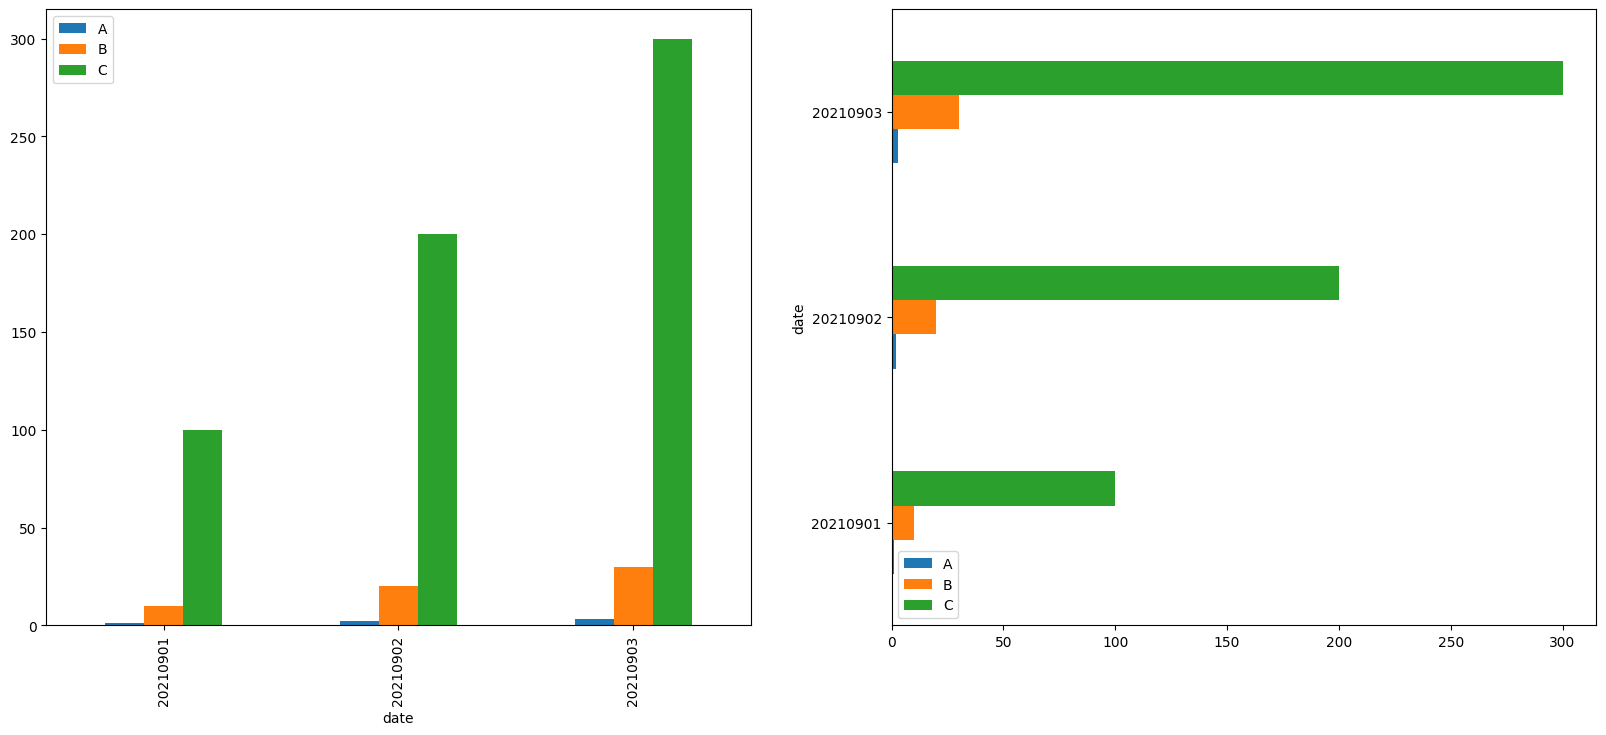

In [17]:
import matplotlib.pyplot as plt
# fig , ax = plt.subplots(1,2)
# fig.set_size_inches(20,8)
fig , ax = plt.subplots(1,2, figsize=(20,8))
pivot1.plot(kind='bar',ax = ax[0])
pivot1.plot(kind='barh',ax = ax[1])
plt.show()

In [26]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
        '지역' : ['안동','안동','안동','경기','경기','부산','서울','안동'],
        '요일' : ['월','월','수','월','화','월','목','금'],
        '강수확률' : [80,70,90,10,20,30,40,80],
        '강수량' : [80,50,100,200,200,100,50,1000]})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [27]:
pd.pivot_table(df, index='요일',
              columns='지역',
              aggfunc=np.max)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9372\3963937981.py:1: FutureWarning: The provided callable <function max at 0x0000010F4070D080> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, index='요일',


강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금     NaN    NaN   NaN  1000.0   NaN   NaN   NaN  80.0
목     NaN    NaN  50.0     NaN   NaN   NaN  40.0   NaN
수     NaN    NaN   NaN   100.0   NaN   NaN   NaN  90.0
월   200.0  100.0   NaN    80.0  10.0  30.0   NaN  80.0
화   200.0    NaN   NaN     NaN  20.0   NaN   NaN   NaN

In [28]:
pd.pivot_table(df, index='요일',
              columns='지역',
              aggfunc=max).fillna(' ')
               # aggfunc='sum' 같은셀의 합계
              # aggfunc='mean' 같은셀의 평균

C:\Users\Admin\AppData\Local\Temp\ipykernel_9372\3015210790.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, index='요일',


강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

In [23]:
data = {
    "도시": ["서울", "부산", "서울", "부산", "대구", "대구"],
    "연도": [2022, 2022, 2023, 2023, 2022, 2023],
    "판매량": [100, 80, 120, 90, 70, 60]
}
df = pd.DataFrame(data)
pivot = df.pivot_table(index="도시", columns="연도", values="판매량", aggfunc="sum", fill_value=0)
# df
pivot

연도,2022,2023
도시,,
대구,70,60
부산,80,90
서울,100,120
